# RESULTS - STARR on MIMIC (External Validation)

In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
if sys.version_info[0] == 3:
    from importlib import reload
import warnings
warnings.filterwarnings('ignore')

os.chdir('/share/pi/boussard/eroosli_work/benchmarking')
import models.evaluation.learningcurves as lc
import models.evaluation.calibration as cb
import models.evaluation.performance as pm

In [2]:
json_strat = json.load(open('models/outputs/starr_ext/predictions/confvals/2020-06-04_12-43.stratified_ihm_results.json'))
json_nonstrat = json.load(open('models/outputs/starr_ext/predictions/confvals/2020-06-04_13-1.nonstratified_ihm_results.json'))

# Performance analysis

### Part 1: Discrimination

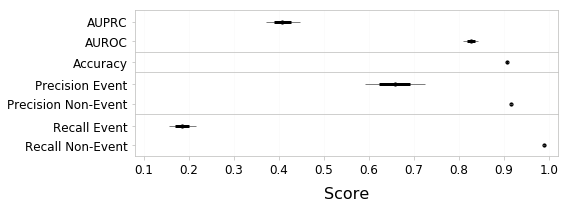

In [3]:
output_json = json_strat
pm.plot_metrics_overall(output_json, 'starr_ext')

### Part 2: Calibration

- Number of Hosmer-Lemeshow groups = 10
- Nonparametric LOWESS smoothing considers 50% of points for each estimation
- Red line: decision threshold used for binary prediction (at predicted risk = 50%)

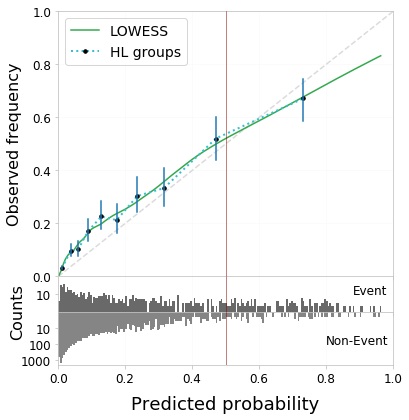

In [4]:
path_results = 'models/outputs/starr_ext/predictions/results/TEST.2020-06-04_12-14.k_clstms.NONE.csv'
results = cb.results_csv(path_results)
reload(cb)
cb.calibration_overall(results, "overall", data='starr_ext')

# Fairness Analysis

## Concept #2: Classification parity

- 10'000 bootstrapping on test set (resampling with replacement, while keeping proportions of outcomes fixed for every demographic group)
- 95% confidence intervals (grey line), SD in bold black, dot indicates median value

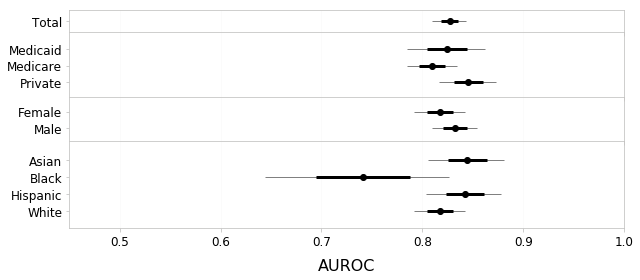

In [5]:
output_json = json_strat
reload(pm)
pm.plot_metric_grouped(output_json, "AUC of ROC", 'starr_ext')

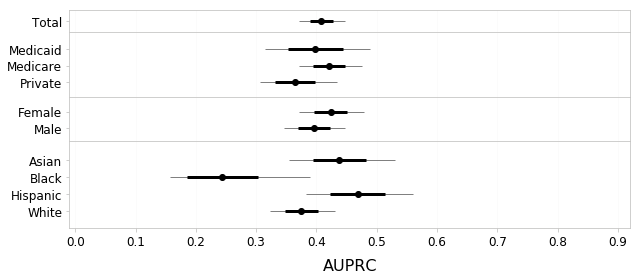

In [6]:
pm.plot_metric_grouped(output_json, "AUC of PRC", 'starr_ext')

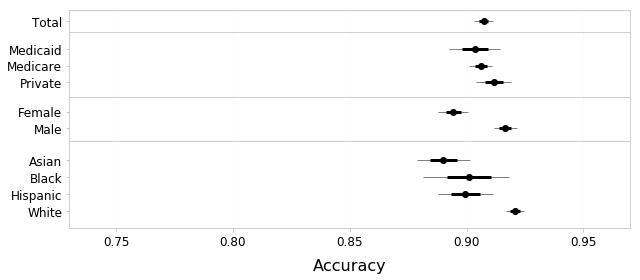

In [7]:
pm.plot_metric_grouped(output_json, "Accuracy", 'starr_ext')

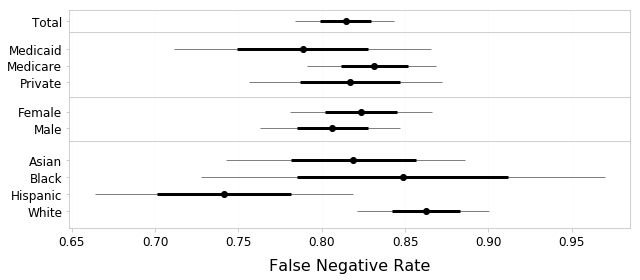

In [8]:
pm.plot_metric_grouped(output_json, "False Negative Rate", 'starr_ext')

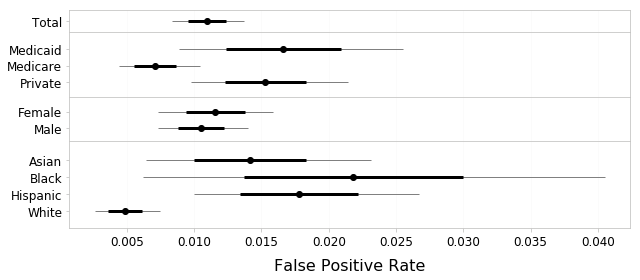

In [9]:
pm.plot_metric_grouped(output_json, "False Positive Rate", 'starr_ext')

## Concept #3: Calibration

### A) Mean calibration (*calibration-in-the-large*)

10'000 bootstrapping without stratification for confidence intervals (**100'000** also tested)

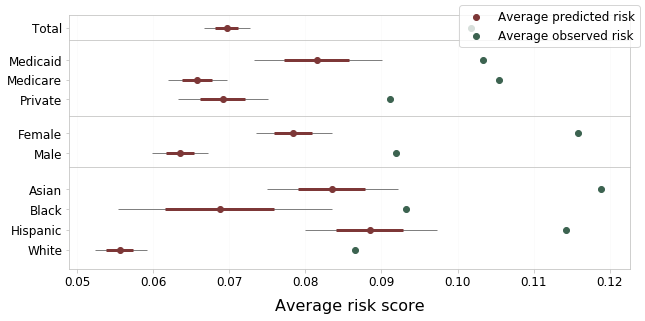

In [10]:
reload(cb)
output_json = json_strat
cb.plot_calibration_mean_strat(output_json, 'starr_ext')

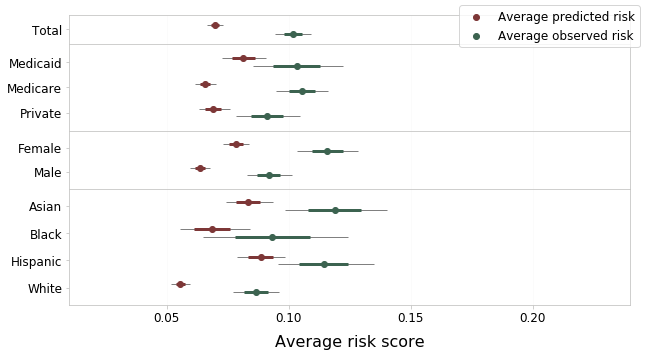

In [11]:
reload(cb)
output_json = json_nonstrat
cb.plot_calibration_mean(output_json, 'starr_ext')

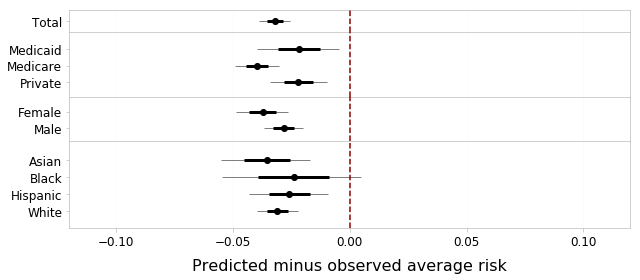

In [12]:
reload(cb)
cb.plot_calibration_diffs(output_json, 'starr_ext')

### B) Calibration plots

**Insurance**

In [13]:
results_priv = results[results["Insurance"] == 4].copy()
results_medicare = results[results["Insurance"] == 2].copy()
results_medicaid = results[results["Insurance"] == 3].copy()
results_pub = results[(results["Insurance"] == 1) | (results["Insurance"] == 2) | (results["Insurance"] == 3)].copy()

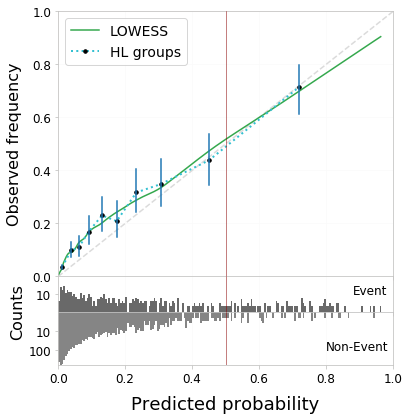

In [14]:
reload(cb)
cb.calibration_overall(results_pub, "pub_ins", data='starr_ext')

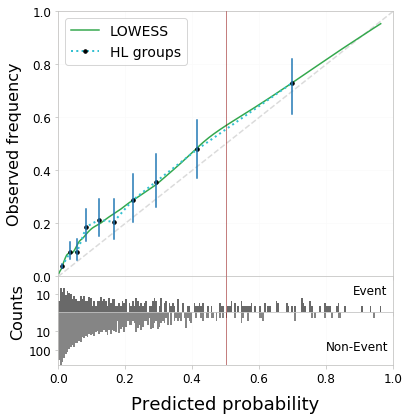

In [15]:
cb.calibration_overall(results_medicare, "pub_medicare", data='starr_ext')

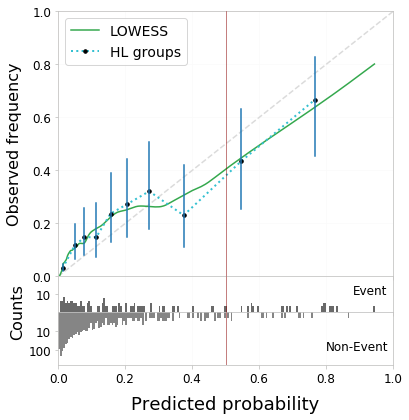

In [16]:
cb.calibration_overall(results_medicaid, "pub_medicaid", data='starr_ext')

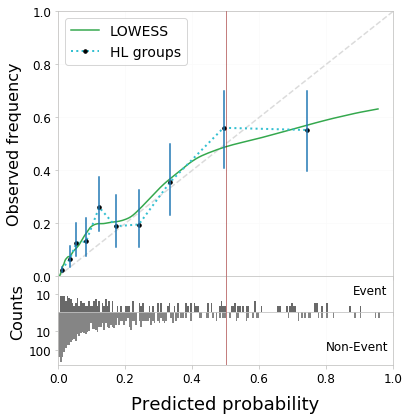

In [17]:
cb.calibration_overall(results_priv, "priv_ins", data='starr_ext')

**Gender**

In [18]:
results_F = results[results["Gender"] == 1].copy()
results_M = results[results["Gender"] == 2].copy()

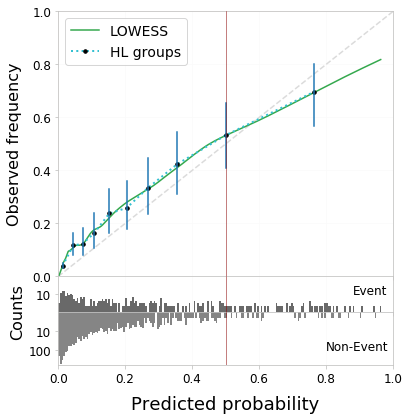

In [19]:
cb.calibration_overall(results_F, "gen_F", data='starr_ext')

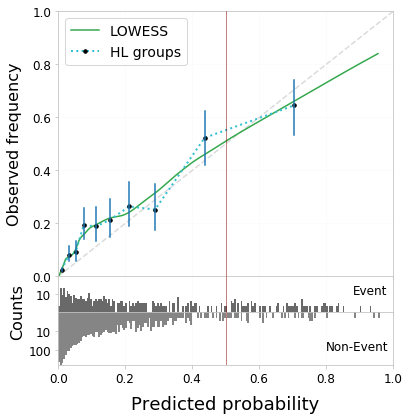

In [20]:
reload(cb)
cb.calibration_overall(results_M, "gen_M", data='starr_ext')

**Ethnicity**

In [21]:
results_asian = results[results["Ethnicity"] == 1].copy()
results_black = results[results["Ethnicity"] == 2].copy()
results_white = results[results["Ethnicity"] == 4].copy()
results_hispa = results[results["Ethnicity"] == 3].copy()

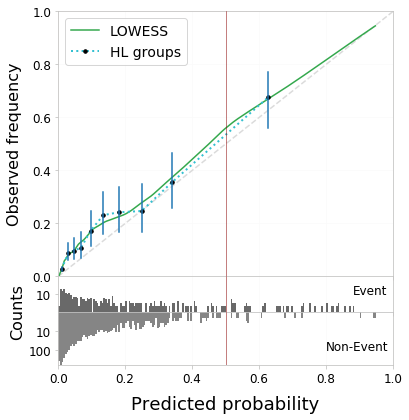

In [22]:
cb.calibration_overall(results_white, "eth_white", data='starr_ext')

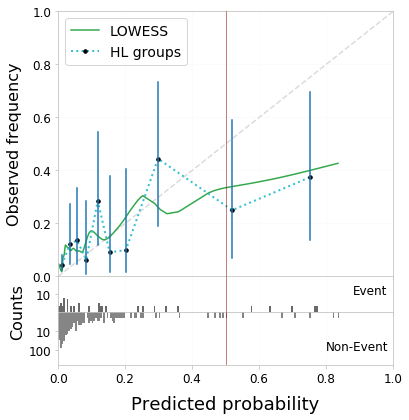

In [23]:
cb.calibration_overall(results_black, "eth_black", data='starr_ext')

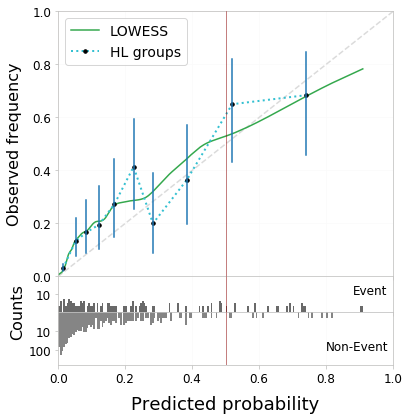

In [24]:
cb.calibration_overall(results_asian, "eth_asian", data='starr_ext')

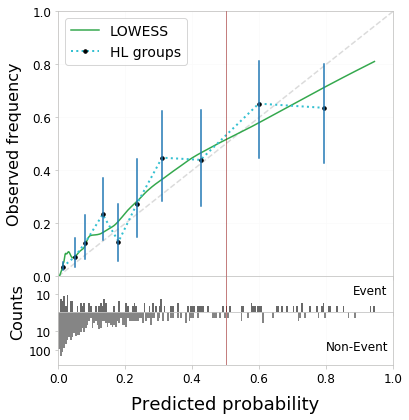

In [25]:
cb.calibration_overall(results_hispa, "eth_hispa", data='starr_ext')